# Veri setini yükleyelim

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
deprem = pd.read_csv("/content/deprem_analiz.csv")
df = deprem
df.head(10)

,ilce_adi,mahalle_adi,mahalle_koy_uavt,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,dogalgaz_boru_hasari,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,ADALAR,BURGAZADA,40139,54,99,256,241,8,6,24,42,0,0,1,398
1,ADALAR,HEYBELİADA,40142,101,175,423,393,25,21,66,113,1,1,2,763
2,ADALAR,KINALIADA,40143,53,97,287,302,5,3,15,27,0,1,1,420
3,ADALAR,MADEN,40140,104,192,483,484,22,18,64,113,1,1,2,847
4,ADALAR,NİZAM,40141,101,180,445,422,16,13,48,83,1,2,2,687
5,ARNAVUTKÖY,ADNAN MENDERES,40490,1,3,21,57,0,0,1,3,0,0,0,89
6,ARNAVUTKÖY,ANADOLU,99359,2,13,108,371,0,0,8,26,1,1,1,659
7,ARNAVUTKÖY,ARNAVUTKÖY MERKEZ,40478,1,6,51,199,0,0,2,10,0,1,1,273
8,ARNAVUTKÖY,ATATÜRK,40482,1,6,49,129,0,0,2,8,0,0,0,209
9,ARNAVUTKÖY,BAKLALI,191981,1,5,23,65,0,0,0,0,0,0,0,26


# Veri seti hakkında verilerin analizi

İlk 5 Satır:
   ilce_adi mahalle_adi  mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
0   ADALAR   BURGAZADA             40139                            54   
1   ADALAR  HEYBELİADA             40142                           101   
2   ADALAR   KINALIADA             40143                            53   
3   ADALAR       MADEN             40140                           104   
4   ADALAR       NİZAM             40141                           101   

   agir_hasarli_bina_sayisi  orta_hasarli_bina_sayisi  \
0                        99                       256   
1                       175                       423   
2                        97                       287   
3                       192                       483   
4                       180                       445   

   hafif_hasarli_bina_sayisi  can_kaybi_sayisi  agir_yarali_sayisi  \
0                        241                 8                   6   
1                        393                25            

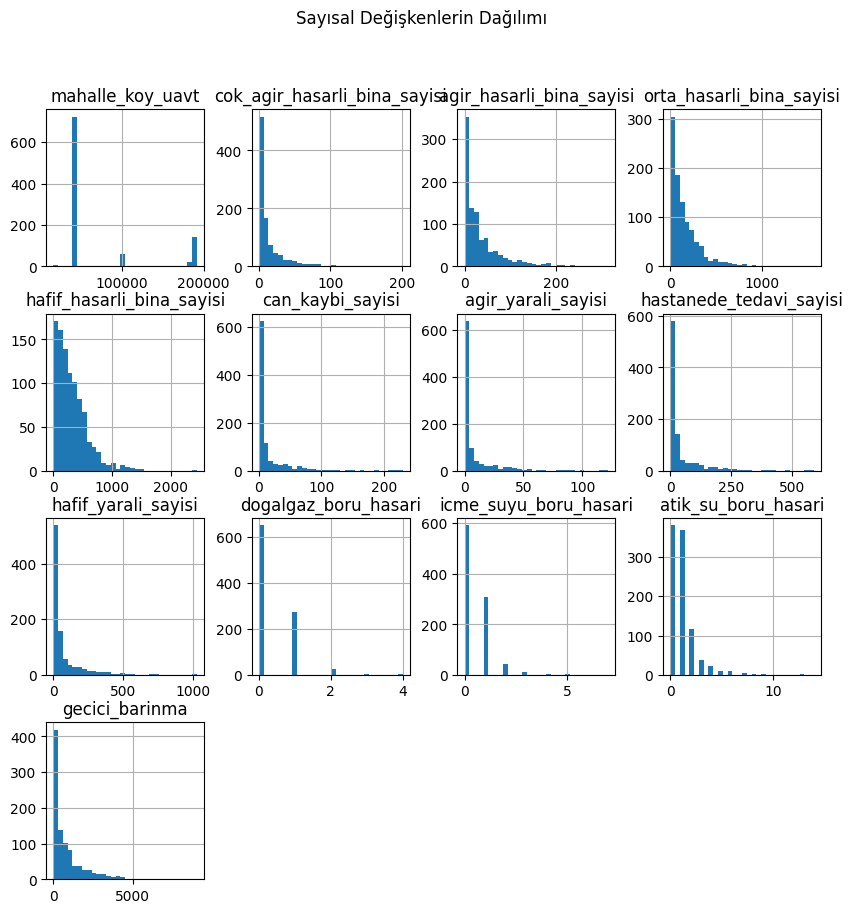

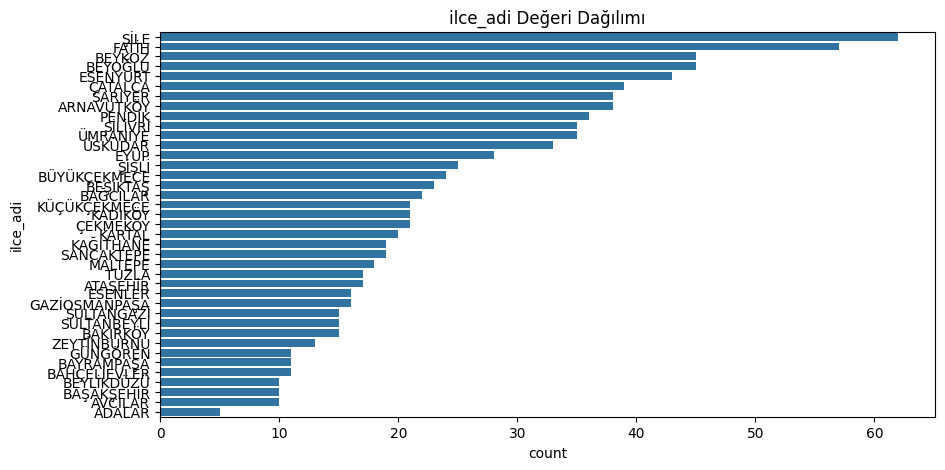

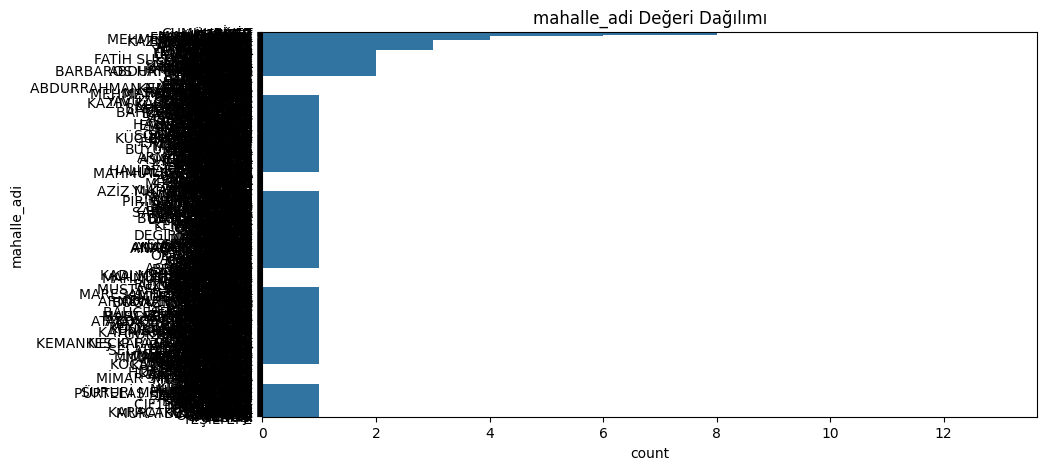


Korelasyon Matrisi:
                               mahalle_koy_uavt  cok_agir_hasarli_bina_sayisi  \
mahalle_koy_uavt                      1.000000                     -0.219561   
cok_agir_hasarli_bina_sayisi         -0.219561                      1.000000   
agir_hasarli_bina_sayisi             -0.264787                      0.912125   
orta_hasarli_bina_sayisi             -0.308731                      0.763863   
hafif_hasarli_bina_sayisi            -0.367522                      0.592846   
can_kaybi_sayisi                     -0.177390                      0.831466   
agir_yarali_sayisi                   -0.173552                      0.865972   
hastanede_tedavi_sayisi              -0.190762                      0.834955   
hafif_yarali_sayisi                  -0.203439                      0.827963   
dogalgaz_boru_hasari                 -0.219315                      0.525448   
icme_suyu_boru_hasari                -0.226392                      0.539754   
atik_su_boru_hasar

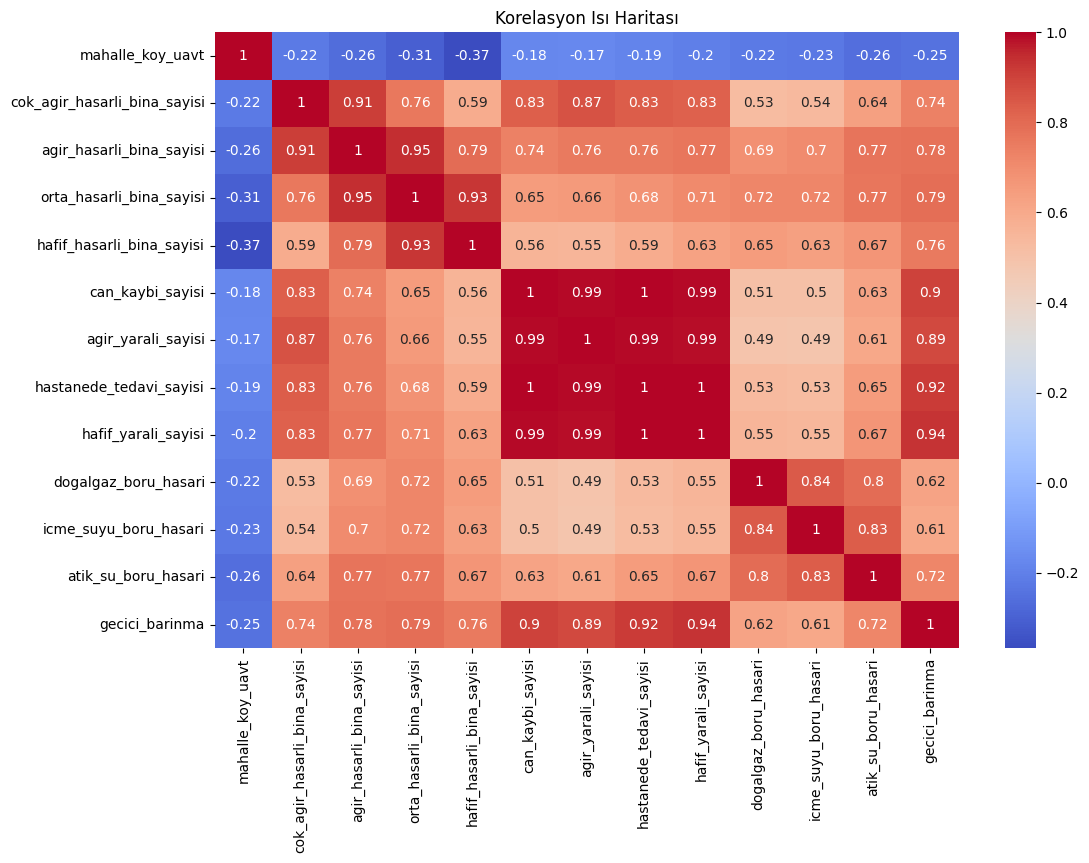

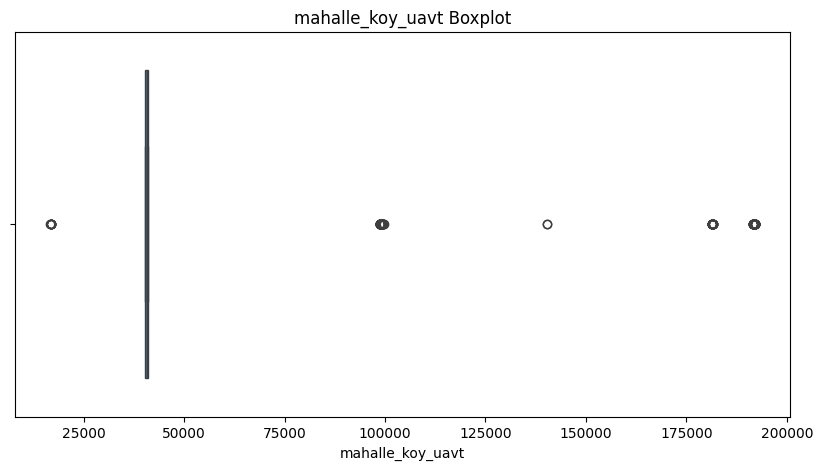

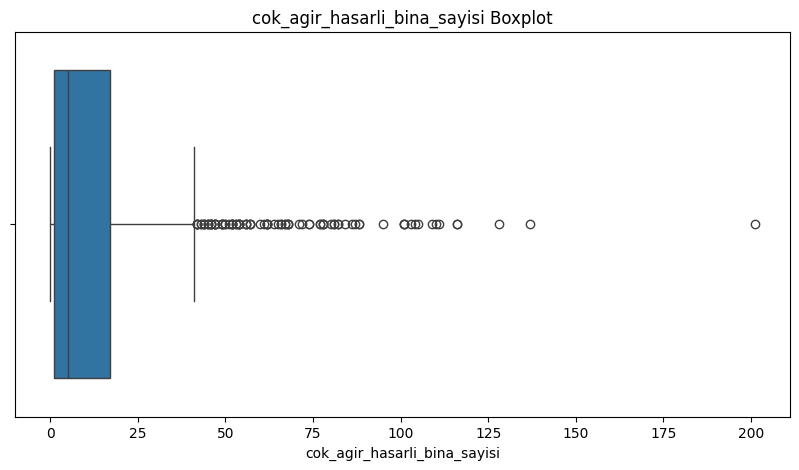

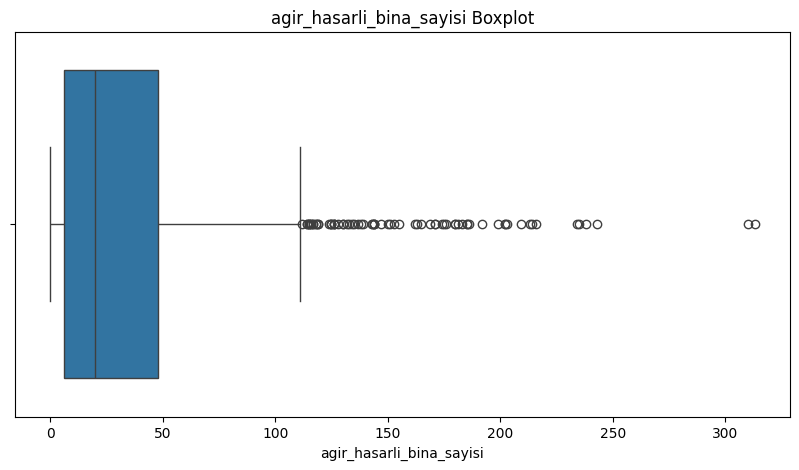

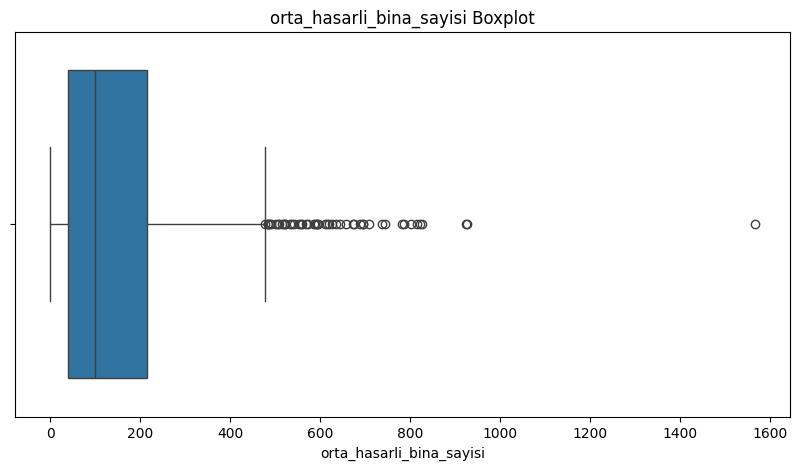

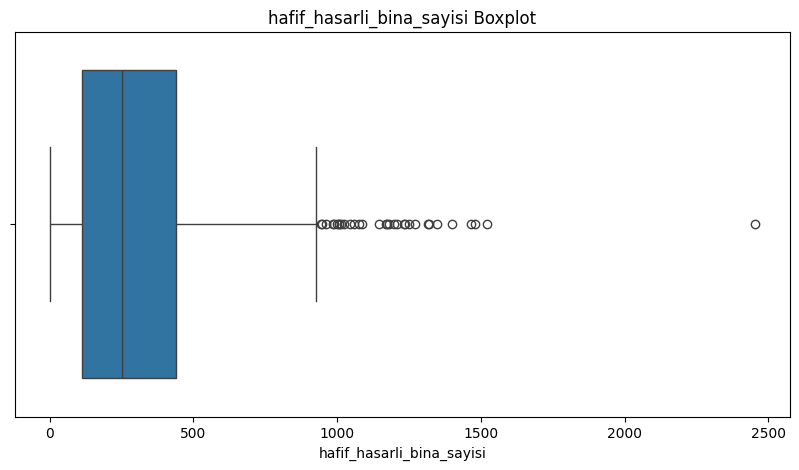

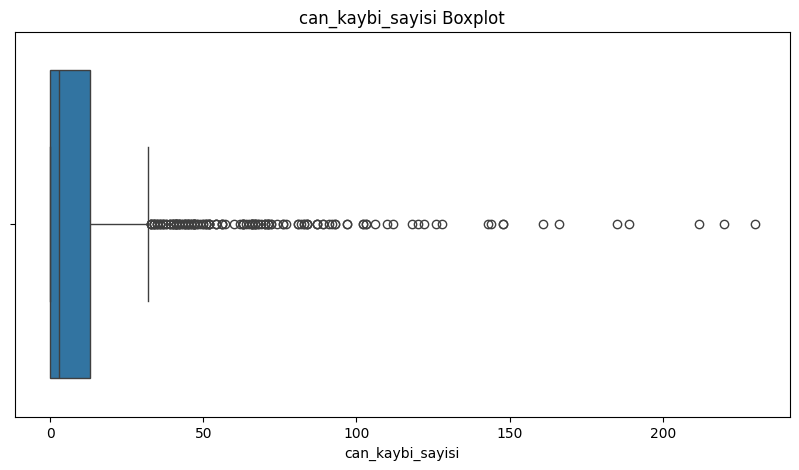

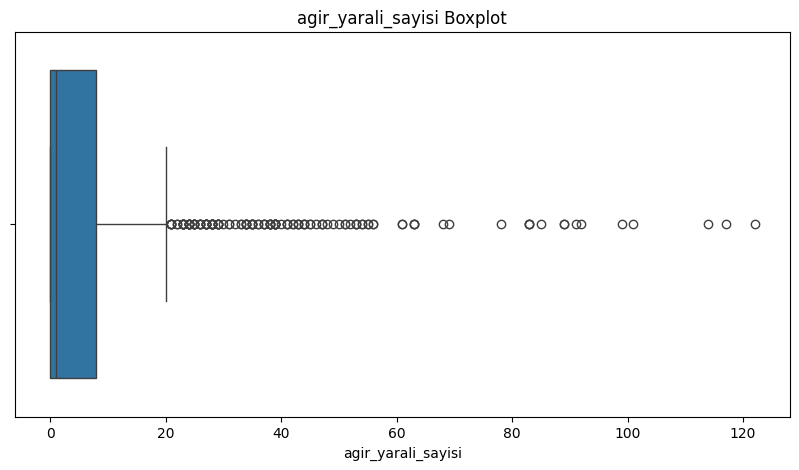

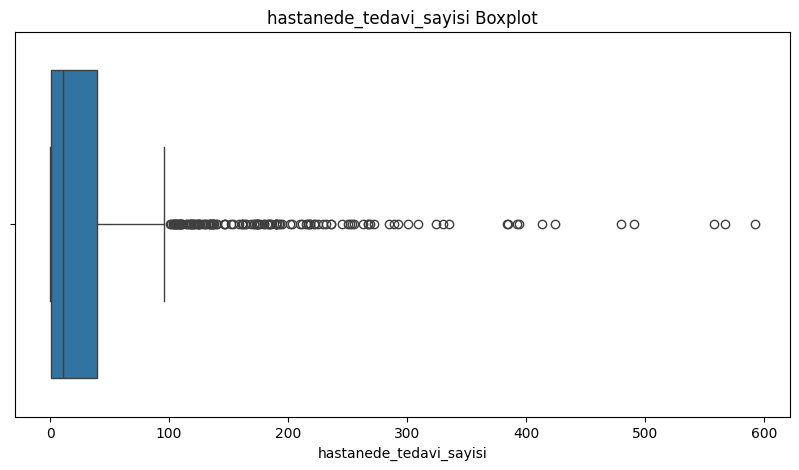

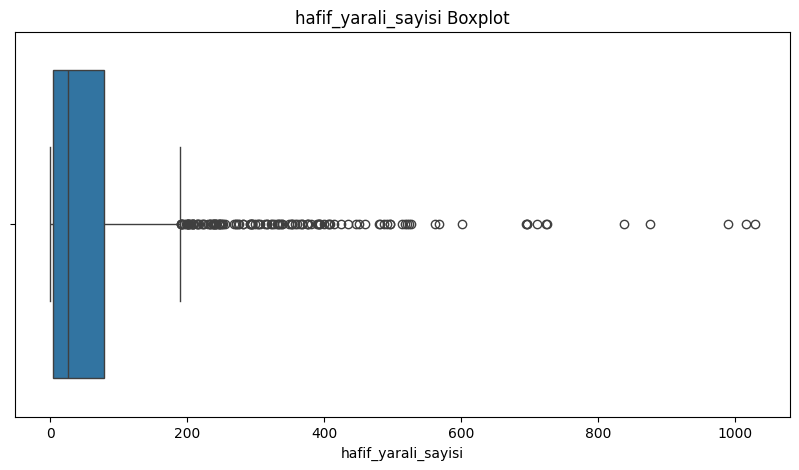

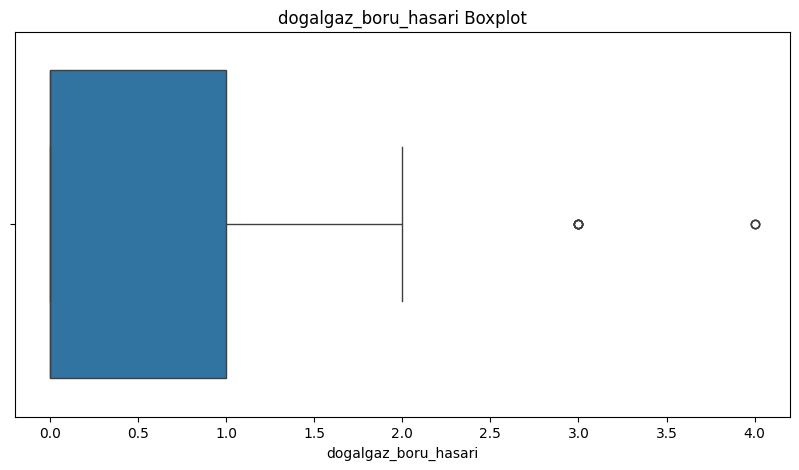

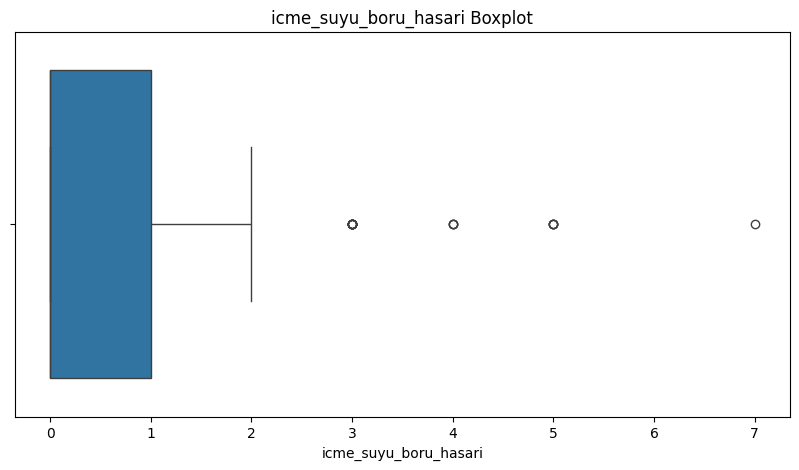

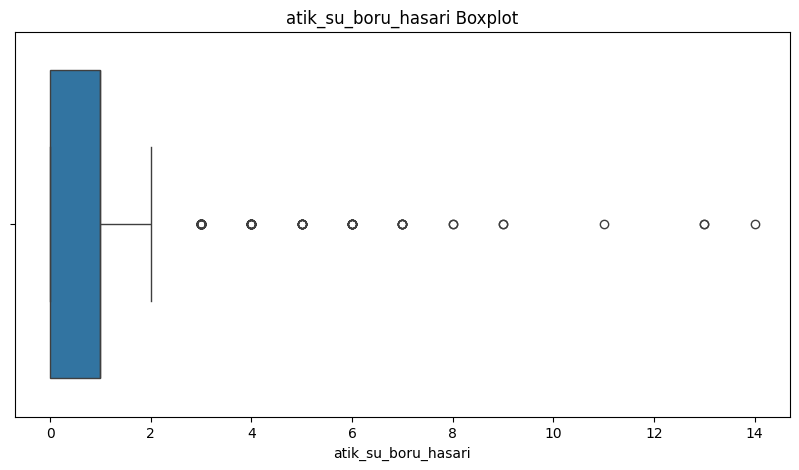

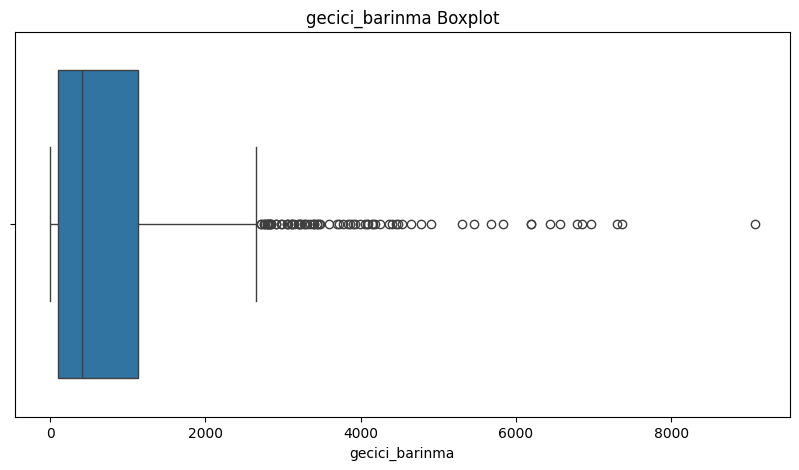


Eksik Değerlerin Oranı:
 Series([], dtype: float64)

mahalle_koy_uavt için Aykırı Değer Sayısı: 236

cok_agir_hasarli_bina_sayisi için Aykırı Değer Sayısı: 92

agir_hasarli_bina_sayisi için Aykırı Değer Sayısı: 72

orta_hasarli_bina_sayisi için Aykırı Değer Sayısı: 50

hafif_hasarli_bina_sayisi için Aykırı Değer Sayısı: 32

can_kaybi_sayisi için Aykırı Değer Sayısı: 149

agir_yarali_sayisi için Aykırı Değer Sayısı: 136

hastanede_tedavi_sayisi için Aykırı Değer Sayısı: 135

hafif_yarali_sayisi için Aykırı Değer Sayısı: 128

dogalgaz_boru_hasari için Aykırı Değer Sayısı: 9

icme_suyu_boru_hasari için Aykırı Değer Sayısı: 18

atik_su_boru_hasari için Aykırı Değer Sayısı: 95

gecici_barinma için Aykırı Değer Sayısı: 78


In [5]:
def analiz(df):
    # Veri setinin ilk ve son birkaç satırını göster
    print("İlk 5 Satır:\n", df.head())
    print("\nSon 5 Satır:\n", df.tail())

    # Temel bilgiler
    print("\nVeri Seti Bilgisi:\n")
    df.info()

    # Eksik değer analizi
    missing_values = df.isnull().sum()
    print("\nEksik Değerler:\n", missing_values[missing_values > 0])

    # Temel istatistikler
    print("\nTemel İstatistikler:\n", df.describe(include='all'))

    # Kategorik ve sayısal değişkenlerin ayrıştırılması
    categorical_columns = df.select_dtypes(include=['object']).columns
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    print("\nKategorik Değişkenler:\n", categorical_columns)
    print("\nSayısal Değişkenler:\n", numerical_columns)

    # Kategorik değişkenlerin değeri sayma
    for col in categorical_columns:
        print(f"\n{col} Değeri Sayma:\n", df[col].value_counts())

    # Sayısal değişkenlerin dağılımı
    df[numerical_columns].hist(figsize=(10, 10), bins=30)
    plt.suptitle('Sayısal Değişkenlerin Dağılımı')
    plt.show()

    # Kategorik değişkenlerin dağılımı
    for col in categorical_columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'{col} Değeri Dağılımı')
        plt.show()

    # Korelasyon matrisi ve ısı haritası
    correlation_matrix = df[numerical_columns].corr()
    print("\nKorelasyon Matrisi:\n", correlation_matrix)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Korelasyon Isı Haritası')
    plt.show()

    # Boxplot ile sayısal değişkenlerin analiz edilmesi
    for col in numerical_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col])
        plt.title(f'{col} Boxplot')
        plt.show()

    # Eksik değerlerin oranını hesaplama
    missing_percentage = (missing_values / len(df)) * 100
    print("\nEksik Değerlerin Oranı:\n", missing_percentage[missing_percentage > 0])

    # Aykırı değer analizi (IQR yöntemiyle)
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
        print(f"\n{col} için Aykırı Değer Sayısı: {outliers.sum()}")


analiz(df)

## Bu projede "dogalgaz_boru_hasari" kategorik değişkenini inceleceğim. Doğalgaz borusunun hasarlı olup olmama durumunun sınıflandırılması yapılacaktır.

In [6]:

# Doğalgaz boru hasarı değişkeninin frekans dağılımı
hasar_frekans = df['dogalgaz_boru_hasari'].value_counts()
print("Frekans Dağılımı:\n", hasar_frekans)

# Ortalama, medyan ve mod
hasar_ortalama = df['dogalgaz_boru_hasari'].mean()
hasar_medyan = df['dogalgaz_boru_hasari'].median()
hasar_mod = df['dogalgaz_boru_hasari'].mode()

print(f"Ortalama: {hasar_ortalama}")
print(f"Medyan: {hasar_medyan}")
print(f"Mod: {hasar_mod}")


Frekans Dağılımı:
 dogalgaz_boru_hasari
0    651
1    272
2     27
3      6
4      3
Name: count, dtype: int64
Ortalama: 0.37122002085505734
Medyan: 0.0
Mod: 0    0
Name: dogalgaz_boru_hasari, dtype: int64


In [7]:
# prompt: dogalgaz_boru_hasari değişkeniyle ilgili eğer değeri 0 sa 0 kalsın değeri eğer 0 dan büyükse 1 olarak yazılsın

df['dogalgaz_boru_hasari'] = df['dogalgaz_boru_hasari'].apply(lambda x: 1 if x > 0 else 0)


## Tekrardan bakalım değerlere

In [10]:

hasar_frekans = df['dogalgaz_boru_hasari'].value_counts()
print("Frekans Dağılımı:\n", hasar_frekans)

# Ortalama, medyan ve mod
hasar_ortalama = df['dogalgaz_boru_hasari'].mean()
hasar_medyan = df['dogalgaz_boru_hasari'].median()
hasar_mod = df['dogalgaz_boru_hasari'].mode()

print(f"Ortalama: {hasar_ortalama}")
print(f"Medyan: {hasar_medyan}")
print(f"Mod: {hasar_mod}")


Frekans Dağılımı:
 dogalgaz_boru_hasari
0    651
1    308
Name: count, dtype: int64
Ortalama: 0.32116788321167883
Medyan: 0.0
Mod: 0    0
Name: dogalgaz_boru_hasari, dtype: int64


## Değerleri görselleştirelim

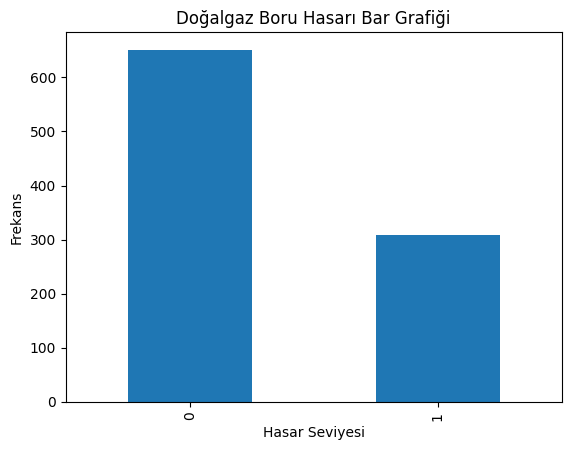

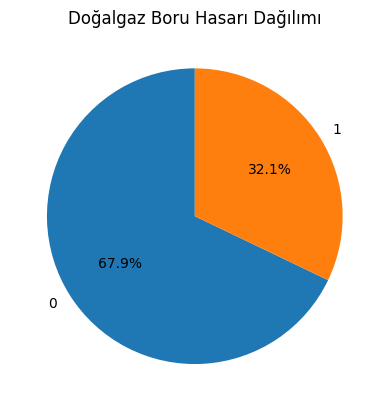

In [12]:
import matplotlib.pyplot as plt



# Bar Grafiği
hasar_frekans.plot(kind='bar')
plt.title('Doğalgaz Boru Hasarı Bar Grafiği')
plt.xlabel('Hasar Seviyesi')
plt.ylabel('Frekans')
plt.show()

# Pie Chart
hasar_frekans.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Doğalgaz Boru Hasarı Dağılımı')
plt.ylabel('')  # Y ekseni başlığını gizleme
plt.show()


In [13]:
df.isnull().values.any() # Veri setinde herhangi bir boş değer yok

False

In [14]:
# prompt: şimdi verisetinden "ilce_adi", "mahalle_adi", "mahalle_koy_uavt" değerlerini kaldır ve "dogalgaz_boru_hasari" değişkeni y olsun geri kalanı x olsun eğit sonra bunları

# Öncelikle verisetinden "ilce_adi", "mahalle_adi", "mahalle_koy_uavt" değerlerini kaldıralım.
df = df.drop(['ilce_adi', 'mahalle_adi', 'mahalle_koy_uavt'], axis=1)

# Daha sonra "dogalgaz_boru_hasari" değişkenini y olarak, geri kalanı x olarak tanımlayalım.
y = df['dogalgaz_boru_hasari']
x = df.drop('dogalgaz_boru_hasari', axis=1)



# Veri setinde x bağımsız değişkenlerini ve y bağımlı değişkenini eğitiyoruz

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier().fit(x_train, y_train)

In [24]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8784722222222222

NOT: Modelin ilkel eğitim yollarıyla başarı oranı %88 çıkmıştır

# Model Tuning ile eğitimimizi optimize edelim

In [25]:
rf_params = {
    "max_depth": [2, 5],
    "max_features": [2, 3],
    "n_estimators": [10, 100],
    "min_samples_split": [2, 5]
}

In [26]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)

In [27]:
rf_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5], 'max_features': [2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 100]},
             verbose=2)

In [28]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 10}


In [30]:
rf_tuned = RandomForestClassifier(max_depth = 5,
                                  max_features = 2,
                                  min_samples_split = 5,
                                  n_estimators = 10)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features=2, min_samples_split=5,
                       n_estimators=10)

In [32]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.8645833333333334

NOT: Modelin hiperparametrelerini değiştirdiğimize başarı oranı düştü. Accuracy score'u arttırmak için farklı değerler denenmeli (çok uzun sürdüğü için böyle bıraktım)

# Değikenlerin önem düzeylerini gösteren görsel alan

In [34]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

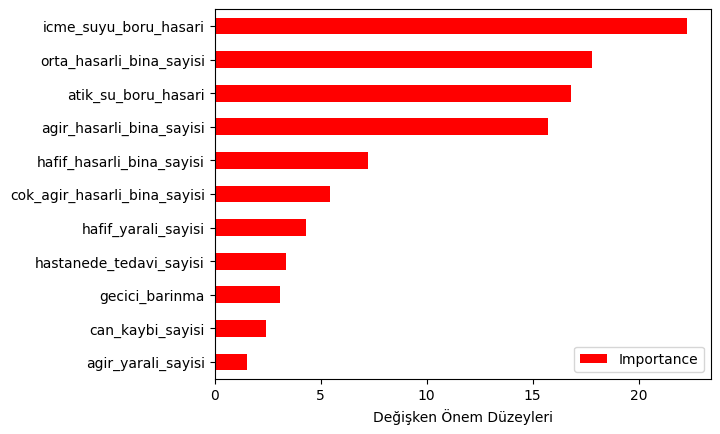

In [35]:
Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

In [36]:
x.head()

,cok_agir_hasarli_bina_sayisi,agir_hasarli_bina_sayisi,orta_hasarli_bina_sayisi,hafif_hasarli_bina_sayisi,can_kaybi_sayisi,agir_yarali_sayisi,hastanede_tedavi_sayisi,hafif_yarali_sayisi,icme_suyu_boru_hasari,atik_su_boru_hasari,gecici_barinma
0,54,99,256,241,8,6,24,42,0,1,398
1,101,175,423,393,25,21,66,113,1,2,763
2,53,97,287,302,5,3,15,27,1,1,420
3,104,192,483,484,22,18,64,113,1,2,847
4,101,180,445,422,16,13,48,83,2,2,687


Rastgele değerlerini girdiğimiz bir verinin çıkan sonucu hasarlı olmayacaktır çıkmıştır.

In [46]:
model.predict([[50,14,240,15,50,50,68,0,1,1,500]])

array([0])